## W.1 Wrangle Member ID's

### Table of Contents

1. <a href= "#1.-Observations-&-Goals">Observations & Goals</a>
2. <a href= "#2.-Python-Libraries-&-Tools">Python Libraries & Tools</a>
3. <a href= "#3.-Notebook-Settings">Notebook Settings</a>
4. <a href= "#4.-Data-Source">Data Source</a>
5. <a href= "#5.-Split-Trailing-Digits-off-ID">Split Trailing Digits from ID</a>
6. <a href= "#6.-Strip-Alpha-off-ID">Strip Legacy Alpha from ID</a>
7. <a href= "#7.-Find-Unique-ID's">Find Unique ID</a>
8. <a href= "#8.-Assign-Random-ID's">Assign New ID</a>
9. <a href= "#9.-Map-Old-ID-to-New-ID">Create Dictionary to Map Old to New ID</a>
10. <a href= "#10.-Replace-Old-ID-with-New-ID">Replace Old with New ID</a>
11. <a href= "#11.-Map-Low-Count-Mem_SubNum">Consolidate and Map Low Use IDs</a>
12. <a href= "#12.-Create-New-column-for-Member_Acct">Add Column for Mem-Acct (New IDs)</a>
13. <a href= "#13.-Reorder-New-columns">Reorder DataFrame Columns</a>
14. <a href= "#14.-Analytics">Analytics</a>

### 1. Observations & Goals

Observation:  Members IDs are a combination of primary member and dependents.  The ID is inconsistently stored as strings of different lengths.

Goal: Standardize and assign random ID's.   

### 2. Python Libraries & Tools

In [ ]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from IPython import display

from pivottablejs import pivot_ui
import ipypivot as pt

# pd.read_clipboard()

[<a href='#Table-of-Contents'>Table of Contents</a>]

### 3. Notebook Settings

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


pd.options.display.width

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

pd.options.display.float_format = '{:,.0f}'.format


import winsound
duration = 1300
freq = 440

1000

[<a href='#Table-of-Contents'>Table of Contents</a>]

### 4. Data Source

In [14]:
df = pd.read_pickle('DataFiles/AnnualpickleApr28')

winsound.Beep(freq,duration)

### 5. Split Trailing Digits off ID

In [ ]:
# PURPOSE: Separte SubNum from primary Member_Number.  This will help with analytics of members
#  with multiple dependents.

# df[['Member_Number','Member_SubNum']] = df['Member_Number'].str.split('-', expand=True)
# df.Member_Number.value_counts()

[<a href='#Table-of-Contents'>Table of Contents</a>]

### 6. Strip Alpha off ID

In [ ]:
# PURPOSE: Remove legacy system alpha characters that are no longer used.

# df['Member_Number'] = df['Member_Number'].str.slice(2, )
# df.Member_Number.

[<a href='#Table-of-Contents'>Table of Contents</a>]

### 7. Find Unique ID's

In [ ]:
# PURPOSE: Find unique ID's which can be assigned new numbers.

# dictmember1 = df.Member_Number.unique()
# dictmember1['Old_Num'] = pd.DataFrame(dictmember1)

[<a href='#Table-of-Contents'>Table of Contents</a>]

### 8. Assign Random ID's

In [ ]:
# PURPOSE: Assign new ID numbers using Random Number assignment.

# import random
# min = 10000
# max = 999999

# dictmember1['New_Num'] = [str(random.randint(min,max)) for i in range(len(dictmember1))]
# dictmember1['New_Num'] = [(len(str(max))-len(digit))*'0'+digit for digit in dictmember1['New_Num']]
# dictmember1.sort_values('New_Num')
# dictmember1.duplicated().sum()

[<a href='#Table-of-Contents'>Table of Contents</a>]

### 9. Map Old ID to New ID

In [ ]:
# PURPOSE: Create dictionary to map old numbers to new Random Numbers generated in Step 4.

# dictmember1_dict = dictmember1.set_index('Old_Num').to_dict()['New_Num']

[<a href='#Table-of-Contents'>Table of Contents</a>]

### 10. Replace Old ID with New ID

In [ ]:
# PURPOSE: Apply Dictionary in Step 5 and replace old numbers.

# df.replace({'Member_Number':dictmember1_dict}, inplace = True)
# df.Member_Number.nunique()
# df.Member_Number.sort_values

[<a href='#Table-of-Contents'>Table of Contents</a>]

### 11. Map Low Count Mem_SubNum

In [ ]:
# PURPOSE: Consolidate low count SubNum for streamlining analytics

# df.Member_SubNum.value_counts()
# Mem_Level_dict = { \
#                   '06':'05',\
#                   '07':'05',\
#                   '08':'04'}

# df.replace({'Member_SubNum':Mem_Level_dict}, inplace=True)

# df.Member_SubNum.sort_values()

[<a href='#Table-of-Contents'>Table of Contents</a>]

### 12. Create New column for Member_Acct

In [ ]:
# PURPOSE: Create column for Mem_Acct created after stripping (Step 1 and 2) and assigning 
# new ID's (Step 5)

# df['Member_Acct'] = df.agg('{0[Member_Number]}-{0[Member_SubNum]}'.format, axis=1)
# df.loc[:,['Member_Number', 'Member_SubNum', 'Member_Acct']]

[<a href='#Table-of-Contents'>Table of Conents</a>]

### 13. Reorder New columns

In [ ]:
# PURPOSE: Reorder dataframe columns to improve readability.

# df = df[[
#      'clm_cc2', 'Member_Number', 'Member_SubNum', 'Member_Acct', 'Provider_ID', 'Provider_Qual', 'Provider_Specialty_Code', \
#      'Provider_Specialty_Desc', 'Provider_Facility', 'Claim_ID', 'Claim_Line_Item', \
#      'Claim_File_Date', 'Claim_POS', 'Claim_Bill_Code', 'Claim_Bill_Desc', \
#      'Claim_Bill_Proce_Code', 'Claim_Bill_Proce_Desc', 'Diagnosis_ICD1', 'Diagnosis_ICD2', \
#      'Diagnosis_ICD3', 'Claim_Benefit', 'Claim_Charge', 'Claim_Allowed', 'Claim_CoPay',\
#      'Claim_Deduct', 'Claim_CoInsur', 'Claim_Clearing_Account', 'Claim_Other1', \
#      'Claim_Other2', 'Claim_Other3', 'Claim_Owed', 'Pay_Transaction_ID', \
#      'Claim_Pay_Date']]


# df.rename(columns={'Member_Number':'Member_Acct', 'Member_SubNum':'Member_SubAcct',\
                   # 'Member_Acct':'Member_ID'}, inplace = True)

[<a href='#Table-of-Contents'>Table of Contents</a>]

### 14. Analytics

#### Analytics for Paid Claims

In [157]:
dfp = df.loc[df.Charge_Paid > 0]
dfp.Charge_Paid.count()

148730

In [62]:
out = 'NUMBER OF MEMBERS WITH PAID CLAIMS DURING YEAR'
count = dfp.Mem_Acct.nunique()
countf = "{:,.0f}".format(count)

f"{out}: {countf}"

'NUMBER OF MEMBERS WITH PAID CLAIMS DURING YEAR: 6,094'

In [169]:
mem_count = dfp.value_counts('Mem_Acct')

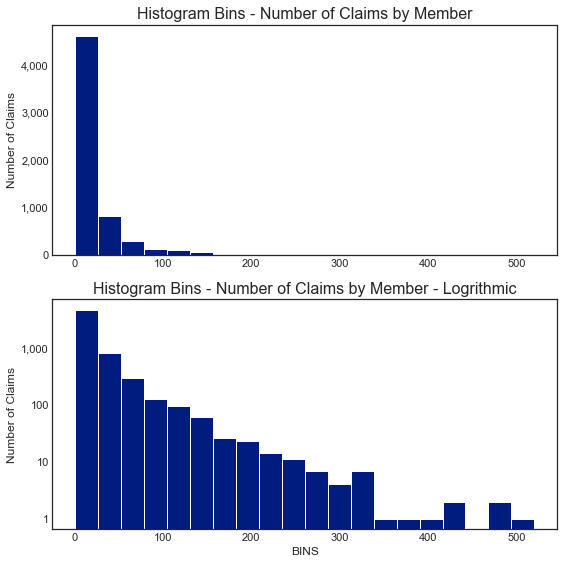

In [170]:
formatter = '{x:,.0f}'

plt.style.use('seaborn-dark-palette')

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))


ax1.hist(mem_count, bins=20)
ax2.hist(mem_count, bins=20, log=True)


ax1.set_title('Histogram Bins - Number of Claims by Member')
# ax1.set_xlabel('Bin')
ax1.set_ylabel('Number of Claims')
ax1.yaxis.set_major_formatter(formatter)

ax2.set_title('Histogram Bins - Number of Claims by Member - Logrithmic')
ax2.set_xlabel('BINS')
ax2.set_ylabel('Number of Claims')
ax2.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show();

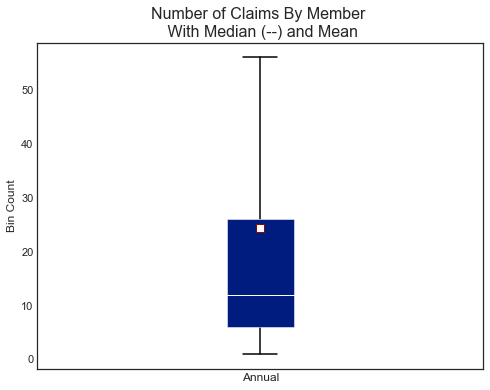

In [151]:

plt.style.use('seaborn-dark-palette')

fig, ax = plt.subplots(figsize=(8,6))
ax.boxplot(mem_count, patch_artist=True,
        showmeans=True,
        meanprops={'marker':'s', 'markerfacecolor': 'white', 'markersize':8},
        showfliers=False,
        medianprops={'color':'white', 'linewidth':1},
        boxprops={'edgecolor':'white','linewidth':0.5},
        whiskerprops={'linewidth':1.5},
        capprops={'linewidth':1.5})

ax.set_title('Number of Claims By Member \n With Median (--) and Mean')
ax.set_xlabel('Annual')
ax.set_ylabel('Bin Count')
ax.tick_params(labelbottom=False)
plt.show();

In [155]:
mem_pvt_mo = dfp.pivot_table(index='Mem_Acct',
               columns='Pay_Period',
               values='Charge_Paid',
               aggfunc='count',
               fill_value=0)
mem_pvt_mo

Pay_Period,1,2,3,4,5,6,7,8,9,10,11,12
Mem_Acct,,,,,,,,,,,,
100129,1,1,0,0,0,0,0,0,0,0,0,0
100196,7,0,1,6,2,0,0,0,0,0,0,0
100257,0,0,1,0,0,0,0,0,0,0,0,0
100341,6,2,3,0,0,0,0,0,0,0,0,0
10049,0,0,0,0,1,4,5,5,5,12,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...
999474,0,0,0,0,0,0,0,1,18,0,0,0
999715,1,3,1,0,2,0,7,0,0,0,0,0
999785,5,0,6,0,0,0,0,0,0,0,0,0


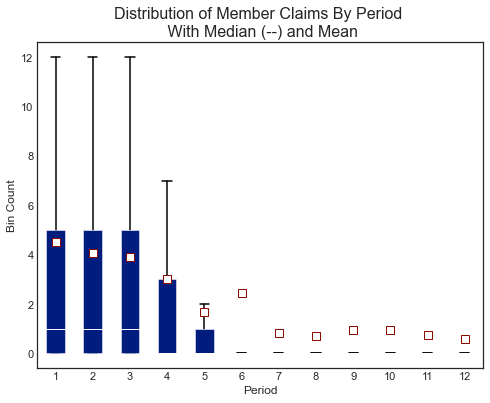

In [166]:
plt.style.use('seaborn-dark-palette')

fig, ax = plt.subplots(figsize=(8,6))
ax.boxplot(mem_pvt_mo, patch_artist=True,
        showmeans=True,
        meanprops={'marker':'s', 'markerfacecolor': 'white', 'markersize':8},
        showfliers=False,
        medianprops={'color':'white', 'linewidth':1},
        boxprops={'edgecolor':'white','linewidth':0.5},
        whiskerprops={'linewidth':1.5},
        capprops={'linewidth':1.5})

ax.set_title('Distribution of Member Claims By Period \n With Median (--) and Mean')
ax.set_xlabel('Period')
ax.set_ylabel('Bin Count')

plt.show();

[<a href='#Table-of-Contents'>Table of Contents</a>]

In [13]:
df.to_pickle('DataFiles/AnnualpickleApr28')